<a href="https://colab.research.google.com/github/DestiniWright/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS6_113_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

X Variable: 
- predictor
- explanatory variable
- feature
- independent variable

Y Variable:
- predicted variable
- explained variable
- target
- dependent variable

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

In [0]:
import numpy as np
dir(np.random)

In [3]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [4]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(2500):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(7500):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users)

[User(purchased=True, time_on_site=135.1190035745262, mobile=True), User(purchased=False, time_on_site=257.1010414252051, mobile=True), User(purchased=False, time_on_site=173.686974938693, mobile=True), User(purchased=True, time_on_site=66.11369382937943, mobile=True), User(purchased=False, time_on_site=206.6069419498752, mobile=True), User(purchased=True, time_on_site=162.77738968833958, mobile=False), User(purchased=True, time_on_site=524.3505872725488, mobile=False), User(purchased=False, time_on_site=55.35756153467413, mobile=True), User(purchased=False, time_on_site=66.24077190954131, mobile=True), User(purchased=False, time_on_site=244.43577331658958, mobile=True), User(purchased=True, time_on_site=274.9728514665423, mobile=True), User(purchased=True, time_on_site=163.70509173094882, mobile=True), User(purchased=False, time_on_site=51.82613560015429, mobile=True), User(purchased=False, time_on_site=72.57675238616393, mobile=True), User(purchased=False, time_on_site=94.36447353283

In [0]:
!pip freeze

In [0]:
!pip install pandas==0.23.4

In [7]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,135.119004,True
1,False,257.101041,True
2,False,173.686975,True
3,True,66.113694,True
4,False,206.606942,True


In [8]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.075440213571072,5.103463747528233,5.1037366957244865,5.122193563156493,5.233546506681181,5.236653834794013,5.2913887391605545,5.291999393909097,5.324994668658405,5.331680061088087,5.354078754233108,5.391044362073391,5.5081049521481615,5.55249286865241,5.5670753926588565,5.603896090576964,5.60859026448021,5.609769320318078,5.616547406191859,5.62516211131602,5.662328358576686,5.668209656473978,5.675632066873225,5.702358479470687,5.706169312909036,5.71013152275502,5.718682337188758,5.772973683721707,5.805770102385421,5.90756131980128,5.925493497021125,5.991300490155068,6.019339331184601,6.045510061582533,6.053580655839268,6.064158713518309,6.0718845527416025,6.096150186991262,6.113519305377352,6.120604540298177,...,591.4057711924441,591.5496556527509,591.7029972137154,591.8743448173636,592.0435728726624,592.1693484071351,592.4994130649407,592.530615236301,592.5474999345059,592.7850402871816,592.9287371641556,593.097126196853,593.1719242875913,593.6250489603894,593.8462705711207,593.9371256479728,594.3196487243357,594.3548341715141,594.4161502077055,594.8860267817754,595.0268115965039,595.72704511365,595.873933371906,595.8757230810762,596.485947732645,596.9465089888396,597.4730263140484,597.8583226502715,597.9809656132624,598.0208667995965,598.2515442733883,598.3580692308116,598.3628983349741,598.3683375992769,598.627901380257,598.892389075698,598.9887989391746,599.16552148872,599.6787502518746,599.7556105418822
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0
True,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,1,...,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,1,0,1,0,1,0,1


In [9]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 6)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.481, 104.189]","(104.189, 203.302]","(203.302, 302.416]","(302.416, 401.529]","(401.529, 500.642]","(500.642, 599.756]"
purchased,,,,,,
False,1990,1796,1605,277,271,221
True,979,1033,1315,133,182,198


In [10]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.481, 104.189]","(104.189, 203.302]","(203.302, 302.416]","(302.416, 401.529]","(401.529, 500.642]","(500.642, 599.756]"
purchased,,,,,,
False,0.670259,0.634853,0.549658,0.67561,0.598234,0.527446
True,0.329741,0.365147,0.450342,0.32439,0.401766,0.472554


In [11]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.702,0.587333
True,0.298,0.412667


In [12]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins], normalize='index')
ct

purchased               False        ...                      True 
time_on_site (4.481, 104.189]        ...         (500.642, 599.756]
mobile                               ...                           
False                0.130800        ...                     0.0792
True                 0.221733        ...                     0.0000

[2 rows x 12 columns]

In [13]:
type(ct)

pandas.core.frame.DataFrame

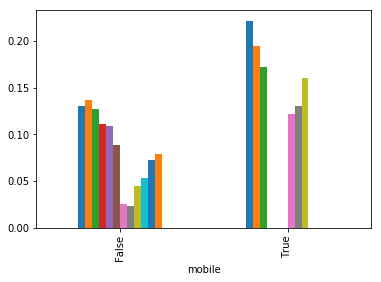

In [14]:
ct.plot(kind='bar', legend=False);

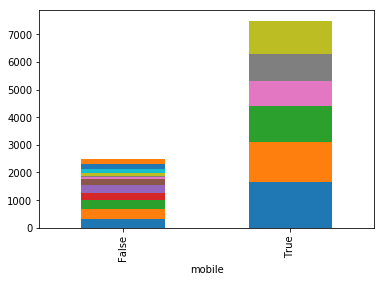

In [15]:
ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins])

ct.plot(kind='bar', stacked=True, legend=False);

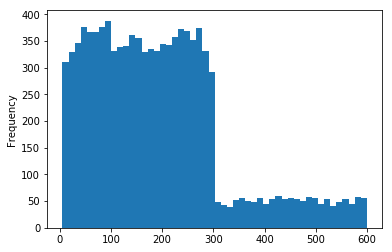

In [16]:
user_data['time_on_site'].plot.hist(bins=50);

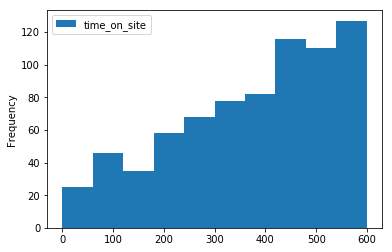

In [17]:
user_data[(user_data['mobile']==False) & (user_data['purchased']==True)].plot.hist()

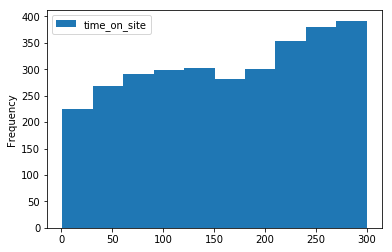

In [18]:
user_data[(user_data['mobile']==True) & (user_data['purchased']==True)].plot.hist()

In [19]:
pt = pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(4.481, 104.189]",0.329741
"(104.189, 203.302]",0.365147
"(203.302, 302.416]",0.450342
"(302.416, 401.529]",0.324390
"(401.529, 500.642]",0.401766
"(500.642, 599.756]",0.472554


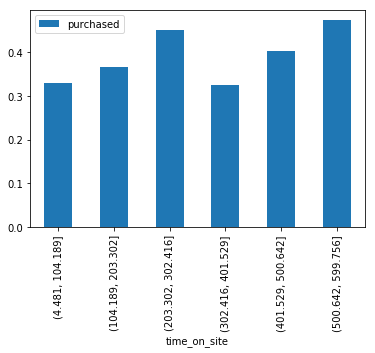

In [20]:
pt.plot.bar()

In [21]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
                 normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.481, 104.189]    0.186325  0.377526  0.084564  0.295961
(104.189, 203.302]  0.194302  0.330306  0.076510  0.315347
(203.302, 302.416]  0.181197  0.292168  0.150336  0.388691
(302.416, 401.529]  0.157835  0.000000  0.178523  0.000000
(401.529, 500.642]  0.154416  0.000000  0.244295  0.000000
(500.642, 599.756]  0.125926  0.000000  0.265772  0.000000

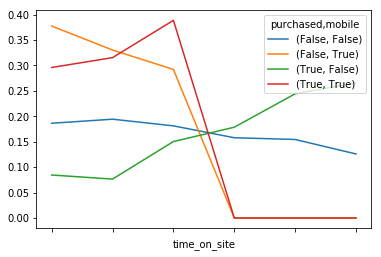

In [22]:
ct.plot();

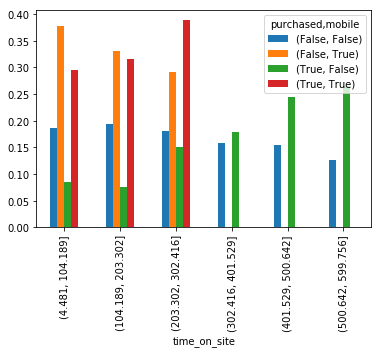

In [23]:
ct.plot(kind='bar');

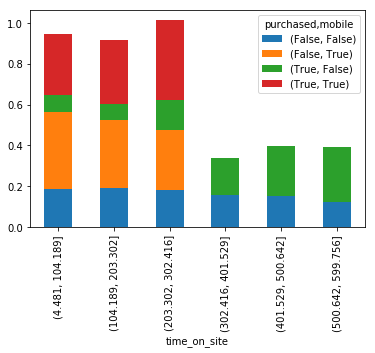

In [24]:
ct.plot(kind='bar', stacked=True);

In [25]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
                 normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.481, 104.189]    0.186325  0.377526  0.084564  0.295961
(104.189, 203.302]  0.194302  0.330306  0.076510  0.315347
(203.302, 302.416]  0.181197  0.292168  0.150336  0.388691
(302.416, 401.529]  0.157835  0.000000  0.178523  0.000000
(401.529, 500.642]  0.154416  0.000000  0.244295  0.000000
(500.642, 599.756]  0.125926  0.000000  0.265772  0.000000

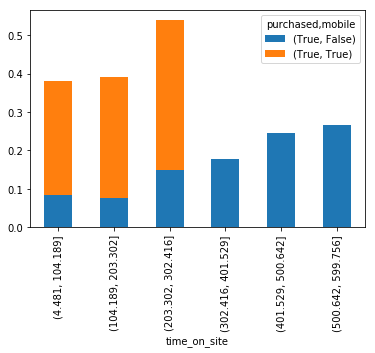

In [26]:
ct_sliced = ct.iloc[:, [2,3]]

ct_sliced.plot(kind='bar', stacked=True);

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [30]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

url = 'https://raw.githubusercontent.com/DestiniWright/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
perData = pd.read_csv(url)    
perData.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [47]:
#hypothesis: higher weight = lower exercise

weightBins = pd.cut(perData['weight'], bins = 5)
exerBins = pd.cut(perData['exercise_time'], bins = 5)
pd.crosstab(exerBins, weightBins, normalize = 'columns')

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",0.141333,0.131343,0.236434,0.424581,0.830189
"(60.0, 120.0]",0.173333,0.226866,0.360465,0.407821,0.169811
"(120.0, 180.0]",0.189333,0.200000,0.217054,0.162011,0.000000
"(180.0, 240.0]",0.210667,0.220896,0.147287,0.005587,0.000000
"(240.0, 300.0]",0.285333,0.220896,0.038760,0.000000,0.000000


In [48]:
#hypothesis seems generally true but I'll test the other variable
ageBins = pd.cut(perData['age'], bins = 4)
pd.crosstab(exerBins, ageBins, normalize = 'columns')

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
exercise_time,,,,
"(-0.3, 60.0]",0.199377,0.203279,0.173913,0.348993
"(60.0, 120.0]",0.174455,0.226230,0.246377,0.412752
"(120.0, 180.0]",0.211838,0.150820,0.188406,0.191275
"(180.0, 240.0]",0.227414,0.173770,0.192029,0.043624
"(240.0, 300.0]",0.186916,0.245902,0.199275,0.003356


In [49]:
pd.crosstab(weightBins, ageBins, normalize = 'columns')

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
weight,,,,
"(99.854, 129.2]",0.323988,0.377049,0.311594,0.234899
"(129.2, 158.4]",0.314642,0.272131,0.297101,0.231544
"(158.4, 187.6]",0.208723,0.190164,0.202899,0.258389
"(187.6, 216.8]",0.121495,0.127869,0.163043,0.187919
"(216.8, 246.0]",0.031153,0.032787,0.025362,0.087248


In [45]:
#Being over 64.5 gives you a greater chance of being over 158 lbs 
#and of exercising less than 2 hours
#there's a drop in 33.5-49 in the middle of exercise time ranges ( 120-240)
#and in middle weight range compared to other groups (129, 187)
#perhaps people tend to either let go of themselves or overcompensate at this age
#causing this group to tend towards the extremes

pd.crosstab(exerBins, [ageBins, weightBins], normalize = 'columns')

age             (17.938, 33.5]      ...         (64.5, 80.0]
weight         (99.854, 129.2]      ...       (216.8, 246.0]
exercise_time                       ...                     
(-0.3, 60.0]          0.105769      ...             0.730769
(60.0, 120.0]         0.134615      ...             0.269231
(120.0, 180.0]        0.201923      ...             0.000000
(180.0, 240.0]        0.230769      ...             0.000000
(240.0, 300.0]        0.326923      ...             0.000000

[5 rows x 20 columns]

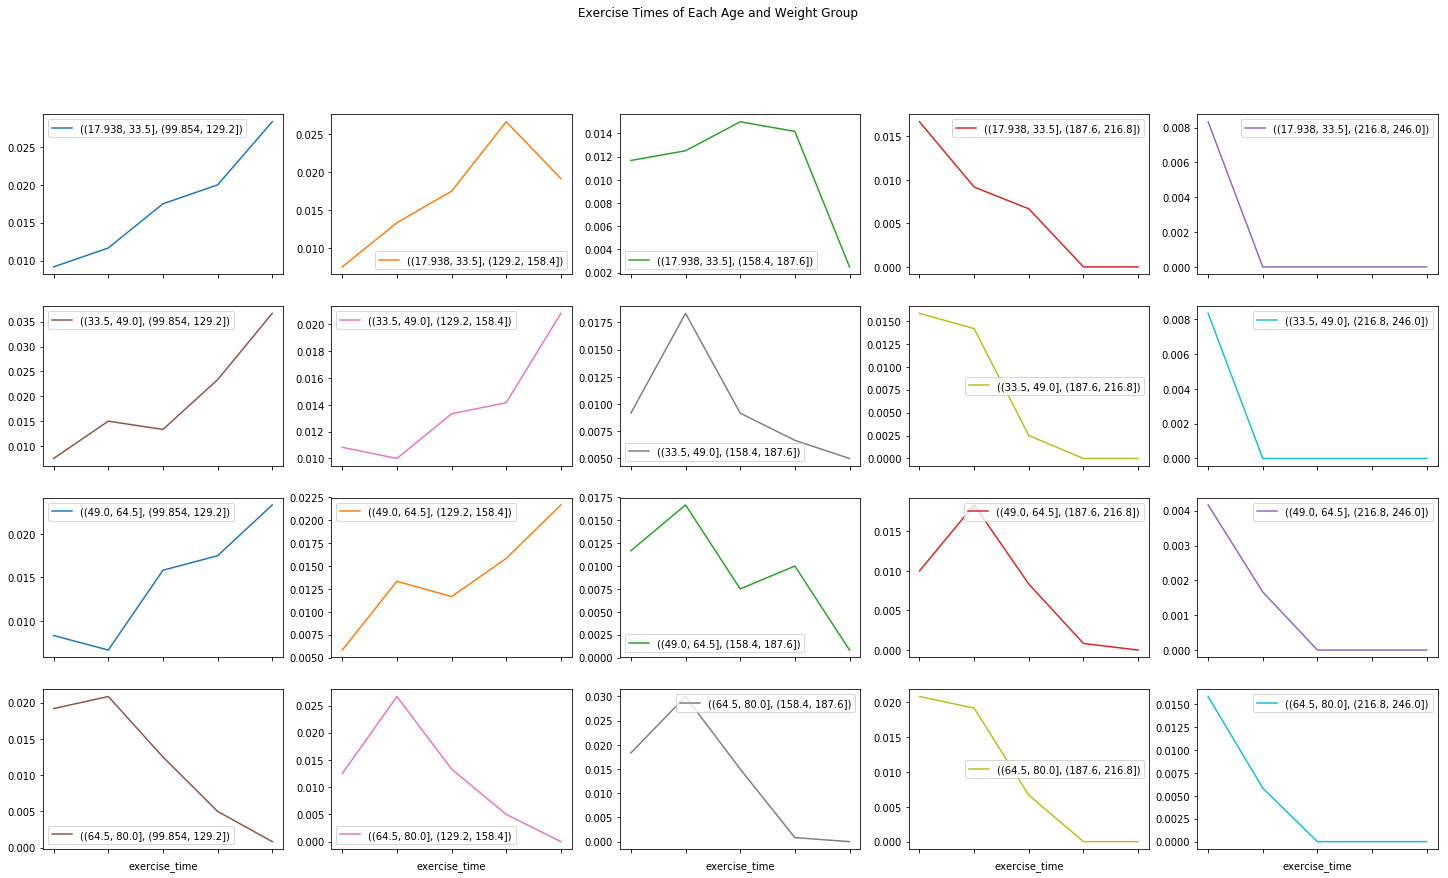

In [75]:
#Nobody that is both below 49 and more than 216 lbs exercises for more than an hour

ct = pd.crosstab(exerBins, [ageBins, weightBins], normalize = True)

ct.plot(subplots = True, sharex = True, layout = (4, 5), figsize = (25, 15), 
        title = 'Exercise Times of Each Age and Weight Group');

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. Age: Ordinal, Discrete

    Weight: Ordinal, Continuous
    
    Exercise Time: Ordinal, Continuous
    

2. As age increases and weight increases, exercise time generally decreases although the actual relationship is a little more complicated.

3. I think weight and exercise time and weight and age are real relationships, while age and exercise time is spurious.  

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)